In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [3]:
print("Number of train fresh apple samples : ", len(os.listdir('dataset/train/freshapples')))
print("Number of train fresh banana samples : ", len(os.listdir('dataset/train/freshbanana')))
print("Number of train fresh orange samples : ", len(os.listdir('dataset/train/freshoranges')))
print("Number of train rotten apple samples : ", len(os.listdir('dataset/train/rottenapples')))
print("Number of train rotten banana samples : ", len(os.listdir('dataset/train/rottenbanana')))
print("Number of train rotten orange samples : ", len(os.listdir('dataset/train/rottenoranges')))

print("Number of test fresh apple samples : ", len(os.listdir('dataset/test/freshapples')))
print("Number of test fresh banana samples : ", len(os.listdir('dataset/test/freshbananas')))
print("Number of test fresh orange samples : ", len(os.listdir('dataset/test/freshoranges')))
print("Number of test rotten apple samples : ", len(os.listdir('dataset/test/rottenapples')))
print("Number of test rotten banana samples : ", len(os.listdir('dataset/test/rottenbananas')))
print("Number of test rotten orange samples : ", len(os.listdir('dataset/test/rottenoranges')))

print("Number of valid fresh apple samples : ", len(os.listdir('dataset/valid/freshapples')))
print("Number of valid fresh banana samples : ", len(os.listdir('dataset/valid/freshbananas')))
print("Number of valid fresh orange samples : ", len(os.listdir('dataset/valid/freshoranges')))
print("Number of valid rotten apple samples : ", len(os.listdir('dataset/valid/rottenapples')))
print("Number of valid rotten banana samples : ", len(os.listdir('dataset/valid/rottenbananas')))
print("Number of valid rotten orange samples : ", len(os.listdir('dataset/valid/rottenoranges')))


Number of train fresh apple samples :  395
Number of train fresh banana samples :  381
Number of train fresh orange samples :  388
Number of train rotten apple samples :  601
Number of train rotten banana samples :  530
Number of train rotten orange samples :  403
Number of test fresh apple samples :  75
Number of test fresh banana samples :  75
Number of test fresh orange samples :  75
Number of test rotten apple samples :  75
Number of test rotten banana samples :  75
Number of test rotten orange samples :  75
Number of valid fresh apple samples :  100
Number of valid fresh banana samples :  100
Number of valid fresh orange samples :  100
Number of valid rotten apple samples :  100
Number of valid rotten banana samples :  100
Number of valid rotten orange samples :  100


In [13]:
train_path = 'dataset/train'
valid_path = 'dataset/valid'
test_path = 'dataset/test'

In [24]:
train_batches = ImageDataGenerator( rescale=1.0/255,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    fill_mode='nearest'
                ) \
.flow_from_directory(
                    directory=train_path,
                    target_size=(150,150),
                    batch_size=10,
                    class_mode='categorical'
                )

valid_batches = ImageDataGenerator(rescale=1.0/255) \
.flow_from_directory(
                    directory=valid_path,
                    target_size=(150,150),
                    batch_size=10,
                    class_mode='categorical'
                )
test_batches = ImageDataGenerator(rescale=1.0/255) \
.flow_from_directory(
                    directory=valid_path,
                    target_size=(150,150),
                    batch_size=10,
                    class_mode='categorical',
                    shuffle= False
                )


Found 2698 images belonging to 6 classes.
Found 600 images belonging to 6 classes.
Found 600 images belonging to 6 classes.


In [15]:
model = Sequential([
    Conv2D(filters=16,kernel_size=(3,3), activation='relu', input_shape=(150,150,3)),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(filters=32,kernel_size=(3,3), activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(filters=64,kernel_size=(3,3), activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.2),
    Flatten(),
    Dense(units=512, activation='relu'),
    Dense(units=6, activation='softmax')
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 17, 17, 64)        0

In [17]:
model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
history = model.fit(x=train_batches,
    steps_per_epoch=len(train_batches),
    validation_data=valid_batches,
    validation_steps=len(valid_batches),
    epochs=20,
    verbose=2
)

Epoch 1/20
270/270 - 66s - loss: 0.4320 - accuracy: 0.8643 - val_loss: 1.3749 - val_accuracy: 0.7333
Epoch 2/20
270/270 - 69s - loss: 0.3982 - accuracy: 0.8732 - val_loss: 0.7017 - val_accuracy: 0.8233
Epoch 3/20
270/270 - 63s - loss: 0.4025 - accuracy: 0.8703 - val_loss: 0.3403 - val_accuracy: 0.8950
Epoch 4/20
270/270 - 62s - loss: 0.4046 - accuracy: 0.8781 - val_loss: 0.3997 - val_accuracy: 0.8617
Epoch 5/20
270/270 - 69s - loss: 0.3830 - accuracy: 0.8910 - val_loss: 0.2368 - val_accuracy: 0.9017
Epoch 6/20
270/270 - 65s - loss: 0.3562 - accuracy: 0.8807 - val_loss: 0.3331 - val_accuracy: 0.9000
Epoch 7/20
270/270 - 62s - loss: 0.4058 - accuracy: 0.8714 - val_loss: 0.3345 - val_accuracy: 0.9100
Epoch 8/20
270/270 - 61s - loss: 0.3749 - accuracy: 0.8895 - val_loss: 0.2627 - val_accuracy: 0.9250
Epoch 9/20
270/270 - 61s - loss: 0.3780 - accuracy: 0.8933 - val_loss: 0.3360 - val_accuracy: 0.8800
Epoch 10/20
270/270 - 61s - loss: 0.4023 - accuracy: 0.8795 - val_loss: 0.3453 - val_accura

Text(0.5, 1.0, 'Training and validation loss')

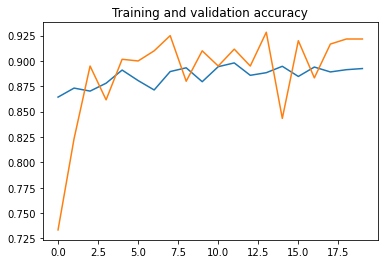

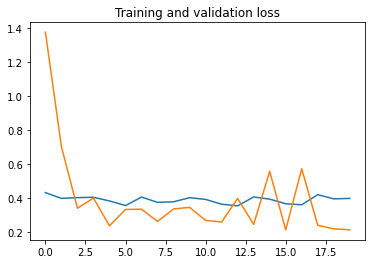

In [20]:
accuracy      = history.history[     'accuracy' ]
val_accuracy  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]
epochs   = range(len(accuracy))

plt.plot  ( epochs,     accuracy )
plt.plot  ( epochs, val_accuracy )
plt.title ('Training and validation accuracy')
plt.figure()

plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

In [21]:
result = model.evaluate_generator(valid_batches, 50)
print('Accuracy of this model is: ', result[1])

c:\users\mohit\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Accuracy of this model is:  0.921999990940094


In [25]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [26]:
np.round(predictions)

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [27]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [28]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [29]:
test_batches.class_indices

{'freshapples': 0,
 'freshbananas': 1,
 'freshoranges': 2,
 'rottenapples': 3,
 'rottenbananas': 4,
 'rottenoranges': 5}

Confusion matrix, without normalization
[[98  0  0  2  0  0]
 [ 0 98  1  1  0  0]
 [ 1  0 97  0  0  2]
 [ 8  0  7 75  0 10]
 [ 0  0  0  0 97  3]
 [ 0  0  7  5  0 88]]


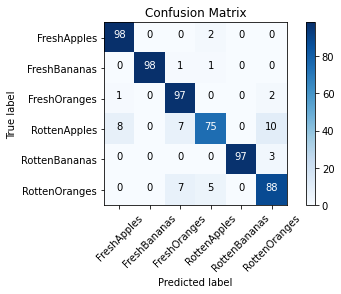

In [30]:
cm_plot_labels = ['FreshApples','FreshBananas','FreshOranges','RottenApples','RottenBananas','RottenOranges']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [31]:
model_version = "2"
model_name = "fruit-ripeness-detection-model_improved"
model_path = os.path.join(model_name, model_version)
tf.saved_model.save(model, model_path)

INFO:tensorflow:Assets written to: fruit-ripeness-detection-model_improved\2\assets


In [34]:
model.save("fruit-ripeness-detection-model_improved.h5")

In [35]:
shutil.make_archive('fruit-ripeness-detection-model_improved', 'zip', 'fruit-ripeness-detection-model_improved')

'D:\\DeepLearning\\Models\\fruit-ripeness-detection-model_improved.zip'